In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/Users/marcolam/git/rascal/rascal/calibrator.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
spectrum = np.loadtxt("data_msp1000/A620EBA HgCal.mspec", delimiter=',')[:,1]

In [3]:
peaks, _ = find_peaks(spectrum, prominence=100, distance=15, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=5)

INFO:rascal.calibrator:num_pix is set to None.
INFO:rascal.calibrator:pixel_list is set to None.
INFO:rascal.calibrator:Plotting with matplotlib.
INFO:rascal.calibrator:num_pix is set to 3648.
INFO:rascal.calibrator:pixel_list is set to None.
INFO:rascal.calibrator:Plotting with matplotlib.


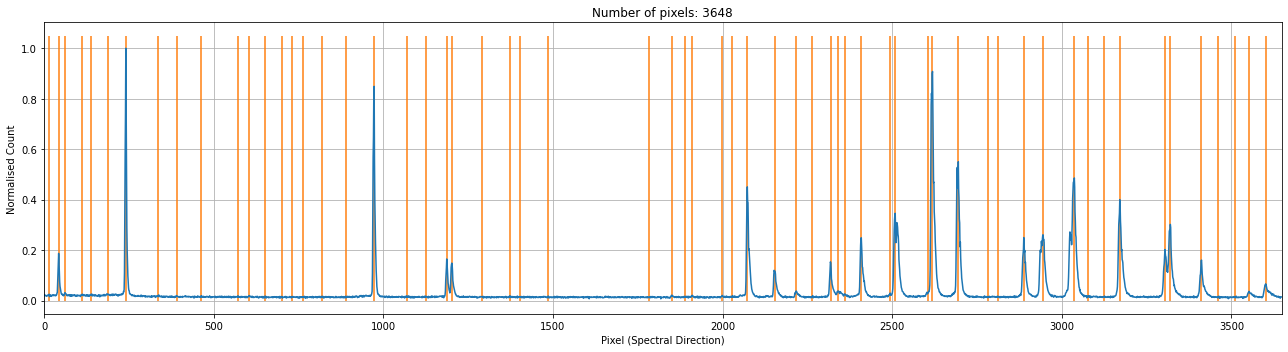

In [4]:
c = Calibrator(peaks_refined, spectrum)

c.set_calibrator_properties(num_pix=len(spectrum),
                            plotting_library='matplotlib',
                            log_level='info') 

c.plot_arc()

In [5]:
c.set_hough_properties(num_slopes=5000,
                       xbins=500,
                       ybins=500,
                       min_wavelength=4000.,
                       max_wavelength=8750.,
                       range_tolerance=500.,
                       linearity_tolerance=50)
c.add_atlas(["Hg"])
c.add_atlas(["Ar"],
            min_atlas_wavelength=6500)

c.set_ransac_properties(sample_size=5,
                        top_n_candidate=5,
                        linear=True,
                        filter_close=True,
                        ransac_tolerance=5,
                        candidate_weighted=True,
                        hough_weight=1.0)
c.do_hough_transform()

INFO:rascal.calibrator:Peak at: 3760.7246894441173 A
INFO:rascal.calibrator:Peak at: 3795.6356416167023 A
INFO:rascal.calibrator:- matched to 3789.989990234375 A
INFO:rascal.calibrator:Peak at: 3819.326360410675 A
INFO:rascal.calibrator:- matched to 3820.381103515625 A
INFO:rascal.calibrator:Peak at: 3880.788476129264 A


INFO:rascal.calibrator:Peak at: 3914.5676533151745 A
INFO:rascal.calibrator:Peak at: 3976.9958464233123 A
INFO:rascal.calibrator:Peak at: 4047.516081760466 A
INFO:rascal.calibrator:- matched to 4046.5439453125 A
INFO:rascal.calibrator:Peak at: 4178.683050128821 A
INFO:rascal.calibrator:Peak at: 4257.323279984887 A
INFO:rascal.calibrator:Peak at: 4358.368316495448 A
INFO:rascal.calibrator:- matched to 4358.30615234375 A
INFO:rascal.calibrator:Peak at: 4515.499573925855 A
INFO:rascal.calibrator:Peak at: 4566.751183185559 A
INFO:rascal.calibrator:Peak at: 4637.498661037141 A
INFO:rascal.calibrator:Peak at: 4711.402837423967 A
INFO:rascal.calibrator:Peak at: 4754.73910794847 A
INFO:rascal.calibrator:Peak at: 4807.380242571449 A
INFO:rascal.calibrator:Peak at: 4891.9203311648325 A
INFO:rascal.calibrator:Peak at: 5002.565668868081 A
INFO:rascal.calibrator:Peak at: 5127.982378857736 A
INFO:rascal.calibrator:- matched to 5120.5908203125 A
INFO:rascal.calibrator:Peak at: 5280.471341505359 A
INF

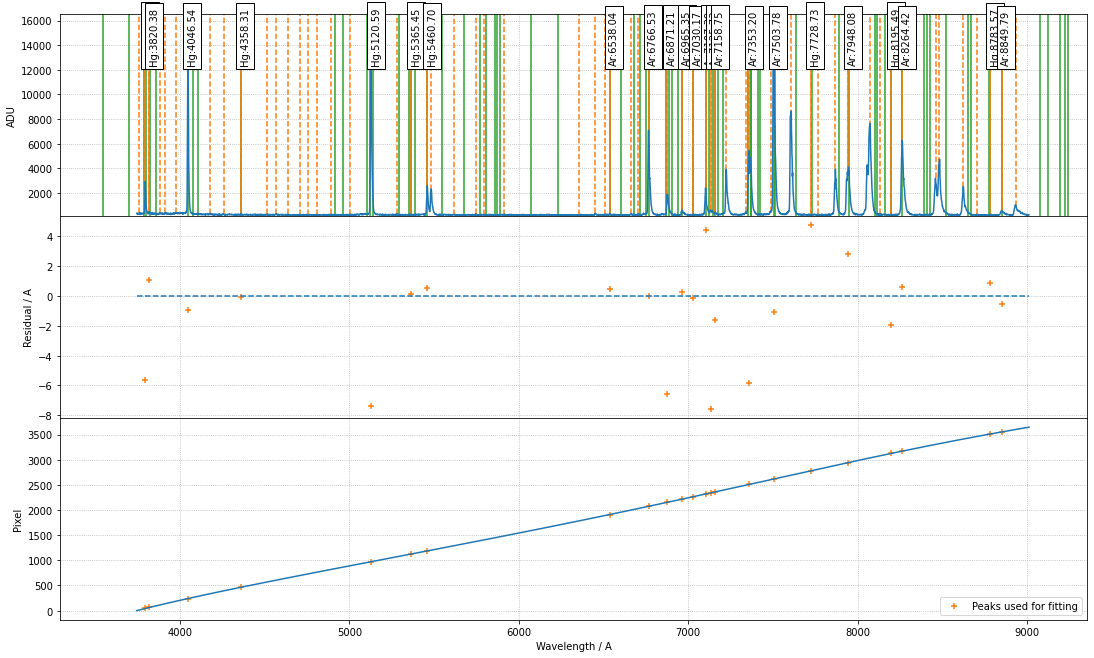

Stdev error: 0.7413497474612232 A
Peaks utilisation rate: 57.377049180327866%


In [6]:
best_p, rms, residual, peak_utilisation = c.fit(max_tries=1000)

c.plot_fit(best_p, plot_atlas=True, log_spectrum=False, tolerance=10.)

rms = np.sqrt(np.sum(residual**2 / len(residual)))

print("Stdev error: {} A".format(np.abs(residual).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))

NB: The peak at 8718.34 is almost certainly the N=1 image of 4358 (Hg)

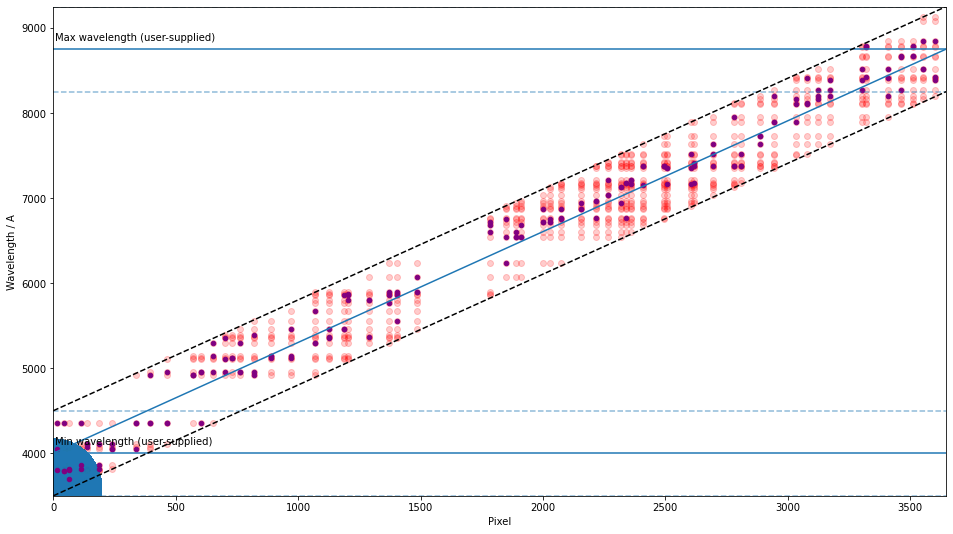

In [7]:
c.plot_search_space()